In [5]:
import nltk
import pandas as pd
amazon_reviews=pd.read_csv("Amazon_Reviews.csv")
amazon_reviews

,Review,Label
0,Stuning even for the non-gamer: This sound tr...,__label__2
1,The best soundtrack ever to anything.: I'm re...,__label__2
2,Amazing!: This soundtrack is my favorite musi...,__label__2
3,Excellent Soundtrack: I truly like this sound...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After H...",__label__2
...,...,...
194,A Book That Is Worth a Second Look: This book...,__label__2
195,Best game ever: This games makes even amazing...,__label__2
196,Guitar in Absentia: With all due respect to a...,__label__1
197,Stiff and Smells like drying paint: You get w...,__label__1


In [6]:


amazon_reviews['Label']=amazon_reviews['Label'].replace({'__label__2 ':1,'__label__1 ':0})




In [7]:
amazon_reviews

,Review,Label
0,Stuning even for the non-gamer: This sound tr...,1
1,The best soundtrack ever to anything.: I'm re...,1
2,Amazing!: This soundtrack is my favorite musi...,1
3,Excellent Soundtrack: I truly like this sound...,1
4,"Remember, Pull Your Jaw Off The Floor After H...",1
...,...,...
194,A Book That Is Worth a Second Look: This book...,1
195,Best game ever: This games makes even amazing...,1
196,Guitar in Absentia: With all due respect to a...,0
197,Stiff and Smells like drying paint: You get w...,0


In [8]:
y=amazon_reviews['Label']

amazon_reviews.drop(columns='Label',axis=1,inplace=True)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(amazon_reviews,y,test_size=0.2,random_state=43)


In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

tokenizer = RegexpTokenizer(r'\w+')
lemmatizer= WordNetLemmatizer()
stemmer= PorterStemmer()

def preprocessing(Review):

    final_tokens=' '
    tokens=tokenizer.tokenize(Review)
    
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    
    stemmed_tokens=[stemmer.stem(pure_token) for pure_token in pure_tokens]
    
    final_tokens=final_tokens.join(stemmed_tokens)
    
    return final_tokens

preprocessing('I was eating my breakfast when you were playing')
X_train['Cleaned_text']=X_train['Review'].apply(preprocessing)
X_train['Cleaned_text']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


116    amaz order cd take abit get live england danc ...
138    henri come home henri back earli 70 forti stil...
155    80 high tech rock emot although mr hine work h...
82     dirti south probabl best southsid cd ever come...
159    perfect die hard basebal fan read basebal amer...
                             ...                        
58     hunt hard way thia gift husband love book arri...
21     delici cooki mix thought funni bought product ...
49     bewar tv set capabl recal function want flash ...
64     live expect order shoe replac previou pair rip...
68     great combin creativ adventur 4 year old daugh...
Name: Cleaned_text, Length: 159, dtype: object

In [10]:
lemmatizer.lemmatize('countries',pos='n')

stemmer.stem('countries')

'countri'

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(stop_words='english',use_idf=True)

vectorizer.fit(X_train['Cleaned_text'])
X_test['Cleaned_text']=X_test['Review'].apply(preprocessing)
X_train_Tfidf=vectorizer.transform(X_train['Cleaned_text'])

X_test_Tfidf=vectorizer.transform(X_test['Cleaned_text'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt

clf = MultinomialNB().fit(X_train_Tfidf.toarray(),y_train)

X_test['Cleaned_text']=X_test['Review'].apply(preprocessing)


y_pred=clf.predict(X_test_Tfidf.toarray())

print(confusion_matrix(y_test,y_pred))

y_proba_pred=clf.predict_proba(X_test_Tfidf.toarray())[::,1]

fpr,tpr,thresholds=roc_curve(y_test,y_proba_pred)

plt.plot(fpr,tpr)

roc_auc_score(y_test,y_proba_pred)

y_pred

[[ 5 14]
 [ 0 21]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [13]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

logreg.fit(X_train_Tfidf.toarray(),y_train)

y_pred=logreg.predict(X_test_Tfidf.toarray())

In [15]:
comparisons_df=pd.DataFrame({'Actuals':y_test,'Predictions':y_pred})

from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

print(confusion_matrix(y_test,y_pred))

print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

[[ 4 15]
 [ 0 21]]
1.0
0.5833333333333334
0.7368421052631579


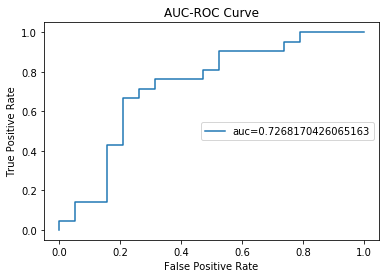

In [17]:
y_pred_proba = logreg.predict_proba(X_test_Tfidf.toarray())[::,1]

y_pred_proba

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba) # the function roc_curve returns three values, the False Positive Rate,True Positive rate
                                                # threshold values it used to calculate the TPR and FPR

auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')

plt.legend(loc=5)
plt.show()

In [18]:
scores_df=pd.DataFrame({'FPR':fpr,'Thresholds':thresholds})
scores_df


,FPR,Thresholds
0,0.000000,1.729624
1,0.000000,0.729624
2,0.052632,0.702477
3,0.052632,0.657442
4,0.157895,0.639372
5,0.157895,0.614948
6,0.210526,0.614450
7,0.210526,0.592571
8,0.263158,0.588034
9,0.263158,0.577079


In [19]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train_Tfidf.toarray(),y_train)
y_dtree_pred=dtree.predict(X_test_Tfidf.toarray())

y_dtree_pred


array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train_Tfidf.toarray(),y_train)
rfc_pred=rfc.predict(X_test_Tfidf.toarray())

rfc_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [21]:
from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier()
ada.fit(X_train_Tfidf.toarray(),y_train)
ada_pred=ada.predict(X_test_Tfidf.toarray())

ada_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [22]:
from sklearn.model_selection import GridSearchCV
hyp_dict={'max_depth':[1,2,3,4,5],
          'min_samples_split':[2,3,4],
          'min_samples_leaf':[1,2,3,4],
          'max_leaf_nodes':[4,5,6,7],}
grid_cv=GridSearchCV(dtree,param_grid=hyp_dict,cv=5)
grid_cv.fit(X_train_Tfidf.toarray(),y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                       

In [23]:
grid_cv.best_params_
grid_cv.best_score_


0.6794354838709677

In [24]:
from sklearn.model_selection import RandomizedSearchCV
random_cv=RandomizedSearchCV(dtree,param_distributions=hyp_dict,cv=5,n_iter=400)

random_cv.fit(X_train_Tfidf.toarray(),y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 240 is smaller than n_iter=400. Running 240 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [25]:
random_cv.best_params_
random_cv.best_score_


0.6731854838709678

In [26]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
parameter_grid={'l1_ratio':[0.15,0.3,0.5,0.6],
                'alpha':[0.0001,0.001,0.01],
                'learning_rate':['adaptive','optimal'],
                 'eta0':[0.1,0.01,0.001]}
grid=GridSearchCV(sgd,cv=5,param_grid=parameter_grid)
grid.fit(X_train_Tfidf.toarray(),y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.1, 0.01, 0.001],
                         'l1_ratio': [0.15, 0.3, 0.5, 0.6],
                         'learning_rate

In [27]:
grid_cv.best_params_
grid_cv.best_score_

0.6794354838709677

In [28]:
from sklearn.svm import SVC
svc=SVC()
parameter_grid={'C':[1.0,2.0,3.0],
                 'kernel':['linear','rbf','polynomial'],
                 'degree':[1,2,3],
                 'gamma':[0.1,1,10]}
grid=GridSearchCV(svc,cv=5,param_grid=parameter_grid)
grid.fit(X_train_Tfidf.toarray(),y_train)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition 

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 2.0, 3.0], 'degree': [1, 2, 3],
                         'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
grid_cv.best_params_
grid_cv.best_score_

0.6794354838709677

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
parameter_grid={'n_neighbors':[5,8,10],
                 'weights':['uniform','distance'],
                 'p':[1,2],
                  'metric':['minkowski']}
grid=GridSearchCV(knc,cv=5,param_grid=parameter_grid)
grid.fit(X_train_Tfidf.toarray(),y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski'], 'n_neighbors': [5, 8, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
grid_cv.best_params_
grid_cv.best_score_

0.6794354838709677